In [36]:
import pandas as pd

# For EDA
import matplotlib.pyplot as plt
import seaborn as sns

# For Data Preprocessing
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Regression Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

# Boosting Techniques
# from xgboost import XGBRegressor
# import lightgbm as lgb

# For Model Evaluation
from sklearn.metrics import mean_absolute_error

%matplotlib inline

In [37]:
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [38]:
data.shape

(1338, 7)

In [39]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


(array([222., 140., 109., 128., 102., 137., 144., 114., 128., 114.]),
 array([18. , 22.6, 27.2, 31.8, 36.4, 41. , 45.6, 50.2, 54.8, 59.4, 64. ]),
 <BarContainer object of 10 artists>)

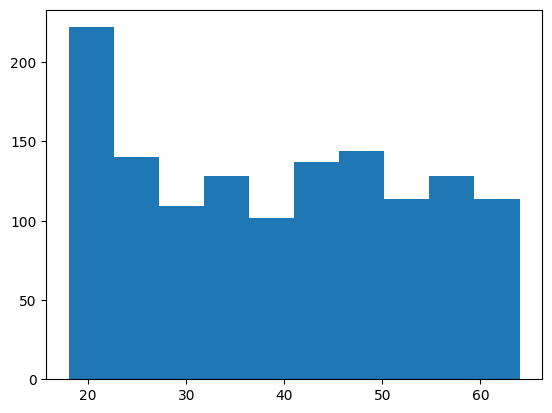

In [41]:
plt.hist(data.age)

C:\Users\hp\AppData\Local\Temp\ipykernel_7480\3500095279.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.age, kde=False)


<Axes: xlabel='age'>

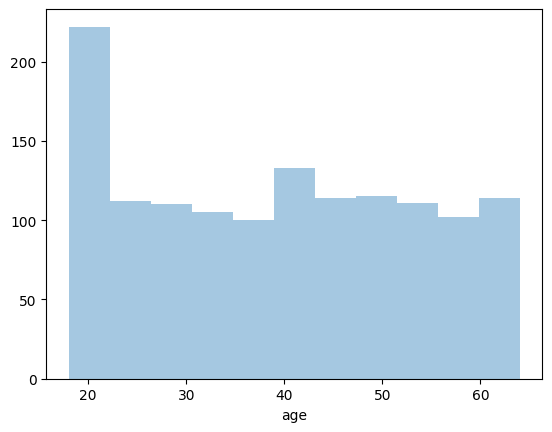

In [42]:
sns.distplot(data.age, kde=False)

<Axes: xlabel='bmi', ylabel='charges'>

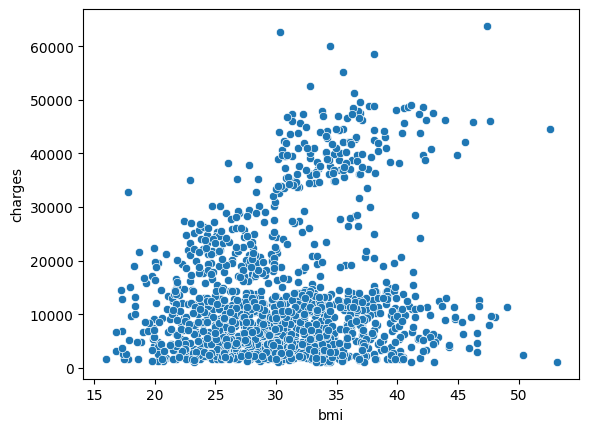

In [43]:
x = data.bmi
y = data.charges

sns.scatterplot(x=x, y=y)

<Axes: xlabel='bmi', ylabel='charges'>

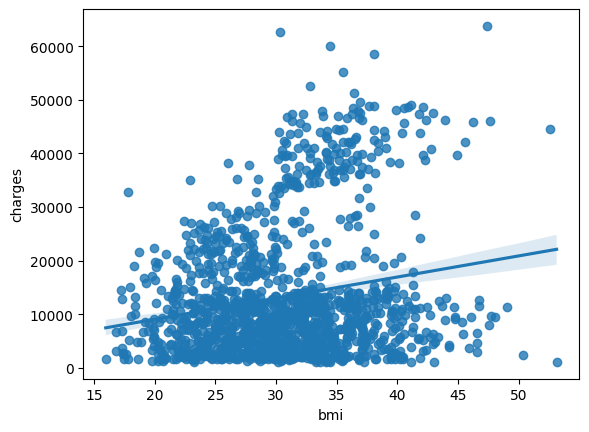

In [44]:
sns.regplot(x=x, y=y)

<Axes: xlabel='bmi', ylabel='charges'>

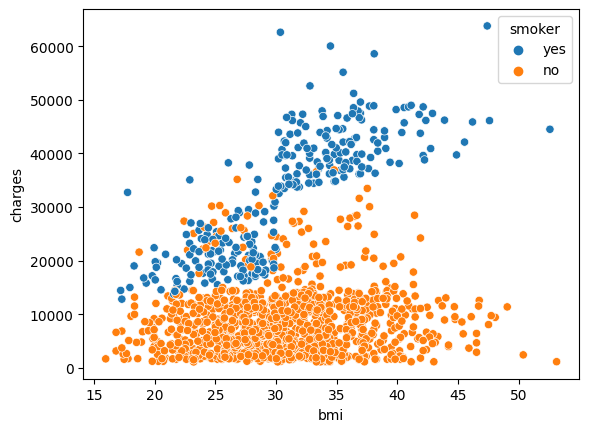

In [45]:
sns.scatterplot(x=x, y=y, hue=data.smoker)

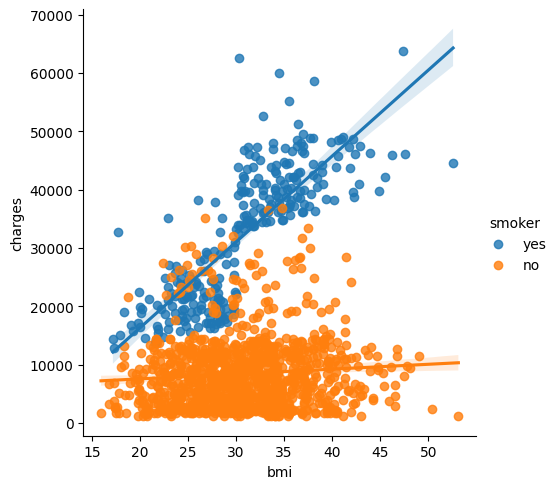

In [46]:
sns.lmplot(x='bmi', y='charges', hue='smoker', data=data)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 37.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='smoker', ylabel='charges'>

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 60.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


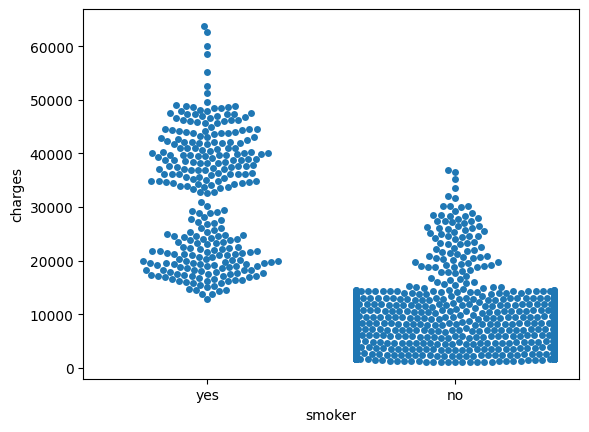

In [47]:
sns.swarmplot(x=data.smoker, y=y)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Axes: xlabel='sex', ylabel='charges'>

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 26.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


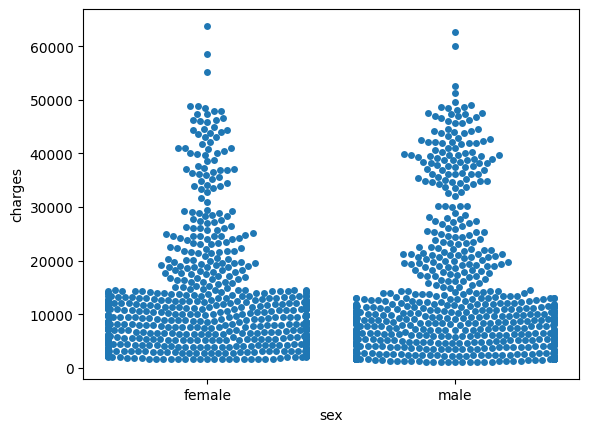

In [48]:
sns.swarmplot(x=data.sex, y=y)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 57.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 44.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 15.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

<Axes: xlabel='children', ylabel='charges'>

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 59.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 46.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 19.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

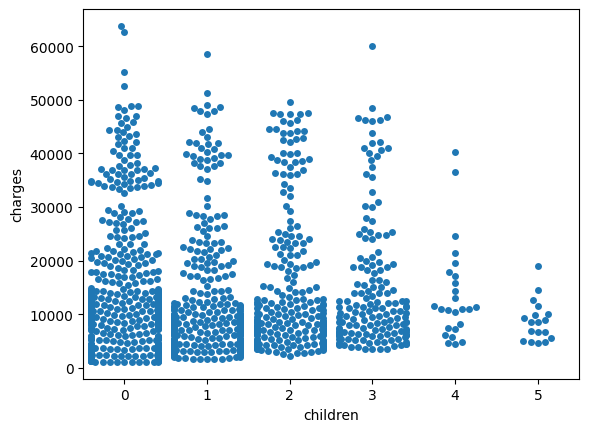

In [70]:
sns.swarmplot(x=data.children, y=y)

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 24.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 23.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 21.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

<Axes: xlabel='region', ylabel='charges'>

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 32.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 30.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarni

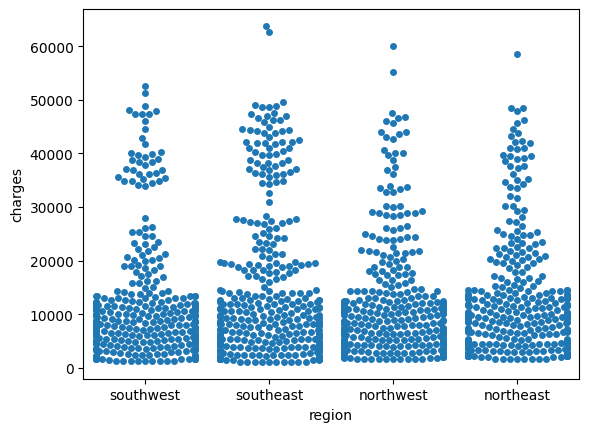

In [50]:
sns.swarmplot(x=data.region, y=y)

In [51]:
cat_data = data.select_dtypes('object')
cat_data.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


In [52]:
num_data = data.select_dtypes(exclude=['object'])
num_data.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [53]:
encoder_one = LabelEncoder()

In [54]:
enc_data = cat_data.apply(encoder_one.fit_transform)
enc_data.head()

,sex,smoker,region
0,0,1,3
1,1,0,2
2,1,0,2
3,1,0,1
4,1,0,1


In [55]:
new_data = enc_data.join(num_data)
new_data.head()

,sex,smoker,region,age,bmi,children,charges
0,0,1,3,19,27.900,0,16884.92400
1,1,0,2,18,33.770,1,1725.55230
2,1,0,2,28,33.000,3,4449.46200
3,1,0,1,33,22.705,0,21984.47061
4,1,0,1,32,28.880,0,3866.85520


In [56]:
features = new_data.columns.drop('charges')
features

Index(['sex', 'smoker', 'region', 'age', 'bmi', 'children'], dtype='object')

In [57]:
y = new_data.charges
X = new_data.drop(['charges'], axis=1)

In [58]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=12)

# DecisionTree

In [59]:
model_one = DecisionTreeRegressor()
model_one.fit(X_train, y_train)

DecisionTreeRegressor()

In [60]:
preds_dt = model_one.predict(X_valid)
mae = mean_absolute_error(preds_dt, y_valid)
print('The MAE for DEcisionTRee : ')
print('>>>>>>: ', mae)

The MAE for DEcisionTRee : 
>>>>>>:  2867.148079179105


# RandomFOrest

In [61]:
model_two = RandomForestRegressor()
model_two.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
preds_rf = model_two.predict(X_valid)
mae = mean_absolute_error(preds_rf, y_valid)
print('The MAE for RandoMForeST : ')
print('>>>>>>: ', mae)

The MAE for RandoMForeST : 
>>>>>>:  2677.6032458915915


# SupportVector

In [63]:
model_three = SVR()
model_three.fit(X_train, y_train)

SVR()

In [64]:
preds_sv = model_three.predict(X_valid)
mae = mean_absolute_error(preds_sv, y_valid)
print('The MAE for SUppoRtVectoR: ')
print('>>>>>>>: ', mae)

The MAE for SUppoRtVectoR: 
>>>>>>>:  7851.024008047883


# KNeighbors

# XGBoost

In [65]:
# model_four = XGBRegressor(learning_rate=0.05)
# model_four.fit(X_train, y_train)

In [66]:
# preds_xgb = model_four.predict(X_valid)
# mae = mean_absolute_error(preds_xgb, y_valid)
# print('The MAE for XGBoost: ')
# print('>>>>>>>: ', mae)

# LighGBM

In [67]:
# param = {'num_leaves': 33, 'metric': 'mean_absolute_error'}
# num_rounds = 550

In [68]:
# dtrain = lgb.Dataset(X_train, y_train)
# dvalid = lgb.Dataset(X_valid, y_valid)

In [69]:
# model_five = lgb.train(param, dtrain, num_rounds, valid_sets=[dvalid], early_stopping_rounds=20)